In [ ]:
#读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。
import os
import pandas as pd
data_path = r'D:\newcode\dase_introduction\open_rank_20236.csv'
df = pd.read_csv(data_path)
top_100 = df.sort_values(by='rank').head(100)
max_value = top_100['value'].max()
min_value = top_100['value'].min()
mean_value = top_100['value'].mean()
median_value = top_100['value'].median()
print(f"排名前100的项目的value最大值: {max_value}")
print(f"排名前100的项目的value最小值: {min_value}")
print(f"排名前100的项目的value均值: {mean_value}")
print(f"排名前100的项目的value中位数: {median_value}")

排名前100的项目的value最大值: 1394.45
排名前100的项目的value最小值: 200.68
排名前100的项目的value均值: 346.9679
排名前100的项目的value中位数: 273.66999999999996


In [ ]:
#读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。
import os
import pandas as pd
data_path = r'D:\newcode\dase_introduction\activity_2022.csv'
df = pd.read_csv(data_path)
top_10_us_repos = [
    'MicrosoftDocs/azure-docs',
    'NixOS/nixpkgs',
    'dotnet/runtime',
    'elastic/kibana',
    'firstcontributions/first-contributions',
    'flutter/flutter',
    'home-assistant/core',
    'microsoft/vscode',
    'pytorch/pytorch',
    'rust-lang/rust'
]

top_10_df = df[df['repo'].isin(top_10_us_repos)]
def calculate_monthly_growth(row):
    values = row[['20221_value', '20222_value', '20223_value', '20224_value', '20225_value', 
                  '20226_value', '20227_value', '20228_value', '20229_value', '202210_value', 
                  '202211_value', '202212_value']].values
    growth_rates = [(values[i] - values[i-1]) / values[i-1] for i in range(1, len(values))]
    return pd.Series(growth_rates, index=[f'growth_{i}' for i in range(1, 12)])
growth_df = top_10_df.apply(calculate_monthly_growth, axis=1)
average_growth_rates = growth_df.mean(axis=1)
overall_average_growth_rate = average_growth_rates.mean()
print("美国排名前十的项目的平均增长率:")
for repo, avg_growth in zip(top_10_us_repos, average_growth_rates):
    print(f"{repo}: {avg_growth:.4f}")

print(f"所有项目的平均增长率: {overall_average_growth_rate:.4f}")

美国排名前十的项目的平均增长率:
MicrosoftDocs/azure-docs: -0.0179
NixOS/nixpkgs: 0.0003
dotnet/runtime: -0.0228
elastic/kibana: -0.0037
firstcontributions/first-contributions: 0.1408
flutter/flutter: -0.0124
home-assistant/core: 0.0085
microsoft/vscode: 0.0229
pytorch/pytorch: 0.0132
rust-lang/rust: -0.0038
所有项目的平均增长率: 0.0125


In [ ]:
#@data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。
import pandas as pd
china_data_path = r'D:\newcode\dase_introduction\china_2022.csv'
global_data_path = r'D:\newcode\dase_introduction\global_2022.csv'
china_df = pd.read_csv(china_data_path)
global_df = pd.read_csv(global_data_path)
columns_to_compare = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'value']
china_stats = china_df[columns_to_compare].describe().T
china_stats['median'] = china_df[columns_to_compare].median()
china_stats['mode'] = china_df[columns_to_compare].mode().iloc[0]
china_stats['variance'] = china_df[columns_to_compare].var()
china_stats['std_dev'] = china_df[columns_to_compare].std()
global_stats = global_df[columns_to_compare].describe().T
global_stats['median'] = global_df[columns_to_compare].median()
global_stats['mode'] = global_df[columns_to_compare].mode().iloc[0]
global_stats['variance'] = global_df[columns_to_compare].var()
global_stats['std_dev'] = global_df[columns_to_compare].std()
print("中国开源领域排名前十企业的统计数据：")
print(china_stats)
print("\n全球开源领域排名前十企业的统计数据：")
print(global_stats)
comparison = pd.concat([china_stats, global_stats], axis=1, keys=['China', 'Global'])
print("\n中国与全球开源领域排名前十企业的统计数据对比：")
print(comparison)

中国开源领域排名前十企业的统计数据：
                count       mean           std       min         25%  \
issue_comment    10.0  61205.500  49332.487917  11741.00  30943.5000   
open_issue       10.0   9169.200   6810.653563    752.00   4625.2500   
open_pull        10.0  16912.700  10068.922805   1823.00   9376.7500   
review_comment   10.0  19857.500  21115.073490   2113.00   3120.0000   
merged_pull      10.0  13764.100   7692.752064   1165.00   8067.2500   
value            10.0  40269.534  30905.171810  12033.71  15161.0375   

                      50%         75%        max     median      mode  \
issue_comment   39141.000  82179.5000  167814.00  39141.000  11741.00   
open_issue       6889.500  14225.5000   22397.00   6889.500    752.00   
open_pull       15953.000  22483.2500   35266.00  15953.000   1823.00   
review_comment  10851.000  31507.7500   60402.00  10851.000   2113.00   
merged_pull     13705.500  18216.2500   26732.00  13705.500   1165.00   
value           29789.235  58554.9625 

In [ ]:

P_non_software = 0.25  # 非软件型项目的先验概率
P_software = 0.75  # 软件型项目的先验概率
P_html_markdown_given_non_software = 0.85  # 非软件型项目中带有 HTML/Markdown 标签的概率
P_html_markdown_given_software = 0.10  # 软件型项目中带有 HTML/Markdown 标签的概率

P_html_markdown = (P_html_markdown_given_non_software * P_non_software +
                   P_html_markdown_given_software * P_software)

P_non_software_given_html_markdown = (P_html_markdown_given_non_software * P_non_software) / P_html_markdown

print(f"P(非软件型 | HTML/Markdown) = {P_non_software_given_html_markdown:.4f}")

P(非软件型 | HTML/Markdown) = 0.7391


In [ ]:
# 已知条件
P_tool_component = 0.5  # 工具组件型项目的先验概率
P_non_tool_component = 0.5  # 非工具组件型项目的先验概率
P_javascript_given_tool_component = 0.35  # 工具组件型项目中使用 JavaScript 的概率
P_javascript_given_non_tool_component = 0.10  # 非工具组件型项目中使用 JavaScript 的概率
P_javascript = (P_javascript_given_tool_component * P_tool_component +
                P_javascript_given_non_tool_component * P_non_tool_component)

P_tool_component_given_javascript = (P_javascript_given_tool_component * P_tool_component) / P_javascript
print(f"P(工具组件型 | JavaScript) = {P_tool_component_given_javascript:.4f}")

P(工具组件型 | JavaScript) = 0.7778


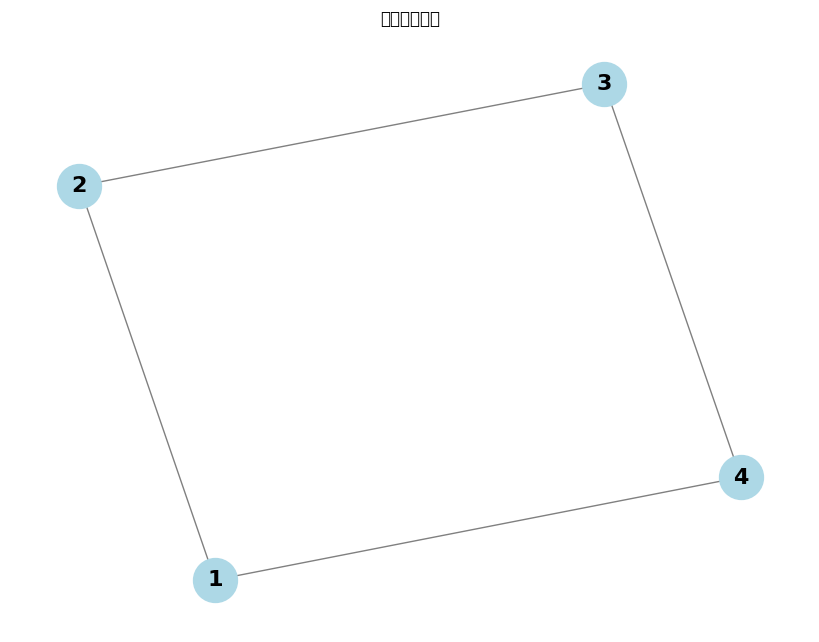

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, edge_color='gray', font_size=16, font_weight='bold')
ax = plt.gca() 
ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelleft=True)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True, linestyle='--', alpha=0.5)
plt.title("无向图可视化")
plt.show()

C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


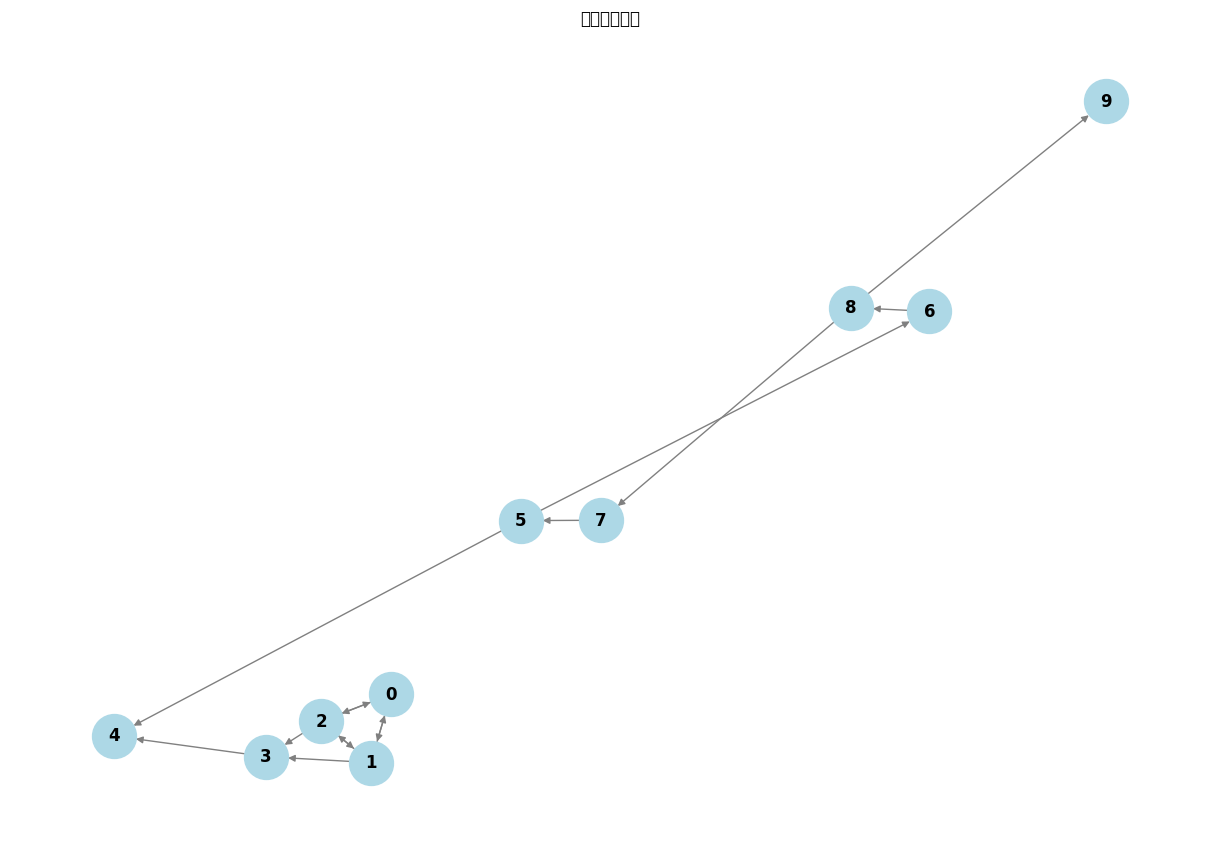

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, edge_color='gray', font_size=12, font_weight='bold', arrows=True)
ax = plt.gca()  
ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelleft=True)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True, linestyle='--', alpha=0.5)
plt.title("有向图可视化")
plt.show()

Node 0: PageRank = 0.0950
Node 1: PageRank = 0.1055
Node 2: PageRank = 0.1055
Node 3: PageRank = 0.0950
Node 4: PageRank = 0.1593
Node 5: PageRank = 0.1020
Node 6: PageRank = 0.0786
Node 7: PageRank = 0.0786
Node 8: PageRank = 0.1020
Node 9: PageRank = 0.0786


C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qb

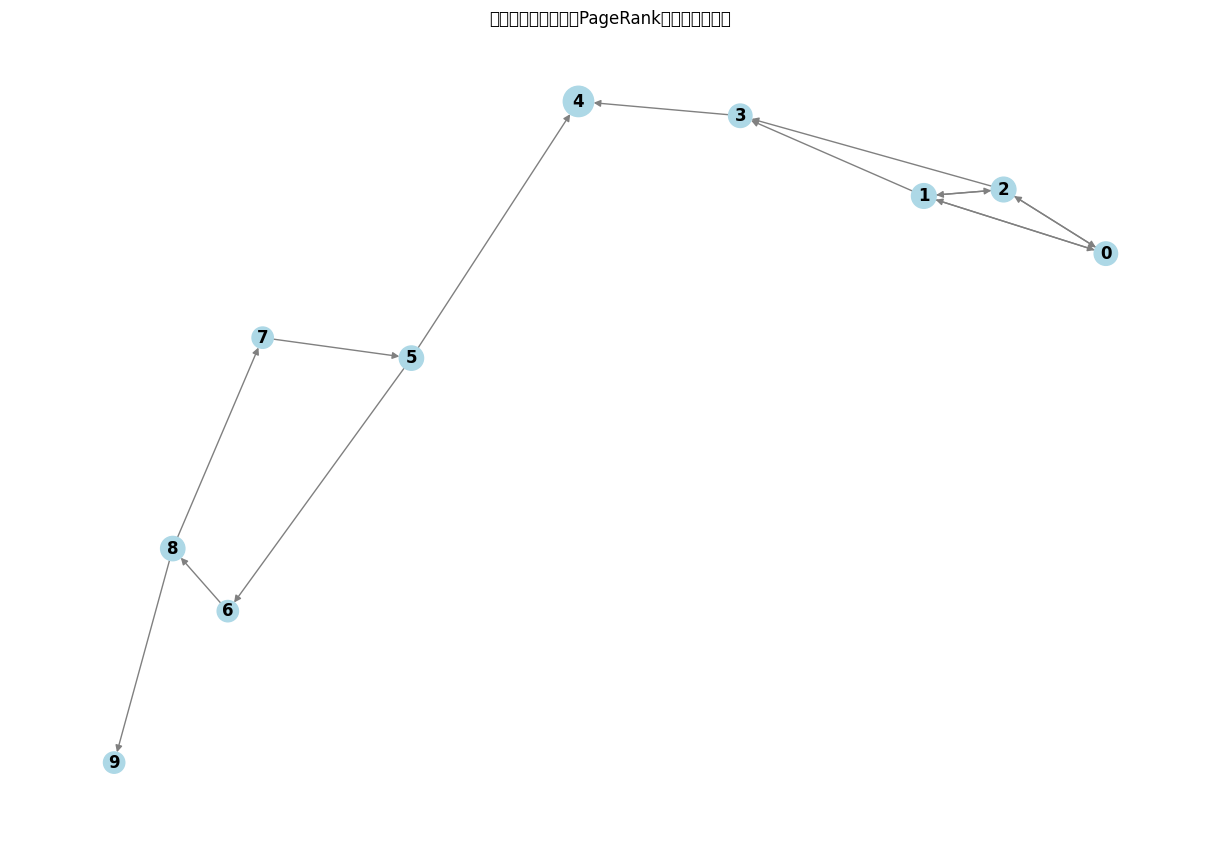

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)
pagerank = nx.pagerank(G)
for node, pr in pagerank.items():
    print(f"Node {node}: PageRank = {pr:.4f}")
node_sizes = [pagerank[node] * 3000 for node in G.nodes()]
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_sizes, edge_color='gray', font_size=12, font_weight='bold', arrows=True)
ax = plt.gca() 
ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelleft=True)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True, linestyle='--', alpha=0.5)
plt.title("有向图可视化（根据PageRank调整节点大小）")
plt.show()